<div>
<img src="https://i.ibb.co/v3CvVz9/udd-short.png" width="150"/>
    <br>
    <strong>Universidad del Desarrollo</strong><br>
    <em>Profesor: Tomás Fontecilla </em><br>

</div>


# Tarea 2: Convolucionados
Integrantes:
- Cristhian Solis
- Cristian Vasquez
- César Soto

## Introducción  

En este laboratirio se busca aplicar y comparar diferentes técnicas de redes neuronales para abordar un problema de clasificación binaria utilizando el conjunto de datos "Chihuahuas vs Muffins". Este desafío permite explorar el diseño y evaluación de modelos, destacando el uso de redes neuronales convolucionales (CNNs) frente a un Perceptrón Multicapa (MLP). A través de esta comparación, se analizarán las capacidades de las CNNs para identificar patrones visuales complejos.

## Objetivos  

- Comparar el desempeño de un modelo de Perceptrón Multicapa (MLP) con redes convolucionales (CNNs).  
- Diseñar y evaluar tres arquitecturas diferentes de redes convolucionales.  

- Analizar las métricas de rendimiento y justificar las diferencias observadas entre los modelos.  
- Presentar los resultados de manera estructurada en un informe técnico en formato Jupyter Notebook.

## Metodología

## Carga y Preprocesamiento de datos

In [19]:
import tensorflow as tf
import os
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense


In [20]:
IMG_SIZE = (128, 128)
BATCH_SIZE = 32    

datagen = ImageDataGenerator(rescale=1.0/255, validation_split=0.2)


ruta_al_dataset = "./dataset" 
#TRAIN_PATH = os.path.join(DATASET_PATH, "train")
#TEST_PATH = os.path.join(DATASET_PATH, "test")


# Preparación de los datos de entrenamiento y validación
train_data = datagen.flow_from_directory(
    ruta_al_dataset,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_data = datagen.flow_from_directory(
    ruta_al_dataset,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

Found 4735 images belonging to 2 classes.
Found 1182 images belonging to 2 classes.


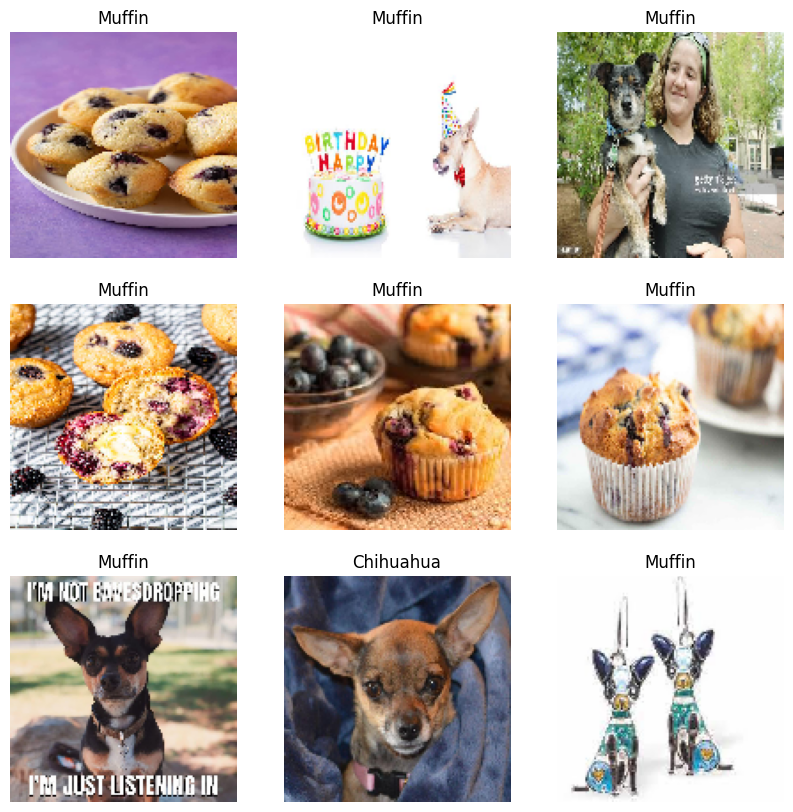

In [21]:
def visualize_batch(data):
    # Obtener un lote de imágenes y etiquetas
    images, labels = next(data)  # `next()` para obtener el siguiente batch del iterador

    # Crear una cuadrícula de 3x3 para mostrar imágenes
    plt.figure(figsize=(10, 10))
    for i in range(9):  # Mostrar 9 imágenes
        plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])  # Ya es un array de NumPy, no se necesita `.numpy()`
        plt.title("Chihuahua" if labels[i].argmax() == 0 else "Muffin")  # Ajusta según tu modelo
        plt.axis("off")
    plt.show()

# Visualizar imágenes del dataset de entrenamiento
visualize_batch(train_data)

In [8]:
# Modelo Perceptrón Multicapa (MLP) ajustado
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense

mlp_model = Sequential([
    Flatten(input_shape=(64, 64, 3)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(2, activation='softmax')
])

mlp_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Entrenamiento del modelo
mlp_history = mlp_model.fit(train_data, validation_data=val_data, epochs=10)

c:\Users\CL160369868\AppData\Local\anaconda3\envs\MLA\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
c:\Users\CL160369868\AppData\Local\anaconda3\envs\MLA\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
148/148 ━━━━━━━━━━━━━━━━━━━━ 64s 420ms/step - accuracy: 0.7385 - loss: 1.1782 - val_accuracy: 0.8003 - val_loss: 0.5413
Epoch 2/10
148/148 ━━━━━━━━━━━━━━━━━━━━ 65s 439ms/step - accuracy: 0.7883 - loss: 0.5391 - val_accuracy: 0.8003 - val_loss: 0.5800
Epoch 3/10
148/148 ━━━━━━━━━━━━━━━━━━━━ 50s 336ms/step - accuracy: 0.7805 - loss: 0.5675 - val_accuracy: 0.8003 - val_loss: 0.6006
Epoch 4/10
148/148 ━━━━━━━━━━━━━━━━━━━━ 50s 337ms/step - accuracy: 0.7884 - loss: 0.5266 - val_accuracy: 0.8003 - val_loss: 0.5396
Epoch 5/10
148/148 ━━━━━━━━━━━━━━━━━━━━ 47s 318ms/step - accuracy: 0.8088 - loss: 0.4881 - val_accuracy: 0.7970 - val_loss: 0.5550
Epoch 6/10
148/148 ━━━━━━━━━━━━━━━━━━━━ 46s 315ms/step - accuracy: 0.7966 - loss: 0.5128 - val_accuracy: 0.8003 - val_loss: 0.5274
Epoch 7/10
148/148 ━━━━━━━━━━━━━━━━━━━━ 47s 314ms/step - accuracy: 0.7904 - loss: 0.5111 - val_accuracy: 0.8003 - val_loss: 0.5222
Epoch 8/10
148/148 ━━━━━━━━━━━━━━━━━━━━ 48s 322ms/step - accuracy: 0.7916 - loss: 0

In [7]:
# Normalizar los valores de píxeles
normalization_layer = tf.keras.layers.Rescaling(1.0 / 255)

# Aplicar normalización a cada dataset
train_dataset = train_dataset.map(lambda x, y: (normalization_layer(x), y))
val_dataset = val_dataset.map(lambda x, y: (normalization_layer(x), y))
test_dataset = test_dataset.map(lambda x, y: (normalization_layer(x), y))


NameError: name 'train_dataset' is not defined

In [11]:
# Prefetch para optimizar el procesamiento
train_dataset = train_dataset.prefetch(buffer_size=tf.data.AUTOTUNE)
val_dataset = val_dataset.prefetch(buffer_size=tf.data.AUTOTUNE)
test_dataset = test_dataset.prefetch(buffer_size=tf.data.AUTOTUNE)


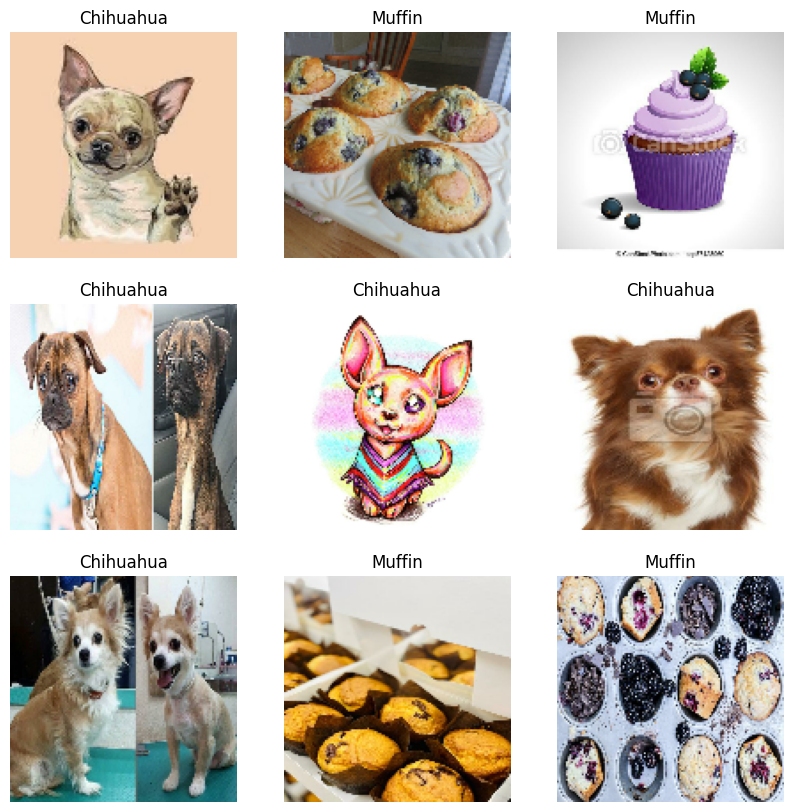

In [16]:
# Visualizar un lote de imágenes
def visualize_batch(dataset):
    images, labels = next(iter(dataset))  # Tomar el primer lote
    plt.figure(figsize=(10, 10))
    for i in range(9):  # Mostrar 9 imágenes
        plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy())  # Convertir tensor a numpy
        plt.title("Chihuahua" if labels[i] == 0 else "Muffin")
        plt.axis("off")
    plt.show()

# Visualizar imágenes del dataset de entrenamiento
visualize_batch(train_dataset)


Modelo MLP (Multilayer Perceptron)

In [17]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout

# Crear modelo MLP
def create_mlp(input_shape):
    model = Sequential([
        Flatten(input_shape=input_shape),         # Convierte imágenes 2D en vectores 1D
        Dense(256, activation='relu'),           # Capa completamente conectada
        Dropout(0.3),                            # Regularización para evitar sobreajuste
        Dense(128, activation='relu'),
        Dropout(0.3),
        Dense(1, activation='sigmoid')           # Capa de salida para clasificación binaria
    ])
    model.compile(
        optimizer='adam',                        # Optimizador Adam
        loss='binary_crossentropy',             # Pérdida para clasificación binaria
        metrics=['accuracy']                    # Métrica de precisión
    )
    return model

# Crear y visualizar el modelo MLP
mlp_model = create_mlp((128, 128, 3))  # Tamaño de entrada: imágenes redimensionadas a 128x128 con 3 canales
mlp_model.summary()                   # Resumen del modelo


c:\Users\CL160369868\AppData\Local\anaconda3\envs\MLA\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 49152)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │    12,583,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,616,193 (48.13 MB)

 Trainable params: 12,616,193 (48.13 MB)

 Non-trainable params: 0 (0.00 B)

In [18]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization

# Crear modelo CNN
def create_cnn(input_shape):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),  # Primera capa convolucional
        MaxPooling2D(pool_size=(2, 2)),                                  # Reducción de dimensionalidad
        BatchNormalization(),                                           # Normalización

        Conv2D(64, (3, 3), activation='relu'),                          # Segunda capa convolucional
        MaxPooling2D(pool_size=(2, 2)),
        BatchNormalization(),

        Conv2D(128, (3, 3), activation='relu'),                         # Tercera capa convolucional
        MaxPooling2D(pool_size=(2, 2)),
        BatchNormalization(),

        Flatten(),                                                      # Aplanar para capas densas
        Dense(256, activation='relu'),
        Dropout(0.5),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(1, activation='sigmoid')                                  # Capa de salida
    ])
    model.compile(
        optimizer='adam',
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    return model

# Crear y visualizar el modelo CNN
cnn_model = create_cnn((128, 128, 3))
cnn_model.summary()  # Resumen del modelo


c:\Users\CL160369868\AppData\Local\anaconda3\envs\MLA\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 63, 63, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 30, 30, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 14, 14, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 256)            │     6,422,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,549,953 (24.99 MB)

 Trainable params: 6,549,505 (24.98 MB)

 Non-trainable params: 448 (1.75 KB)

In [19]:
# Entrenar el modelo MLP
mlp_history = mlp_model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=10,  # Cambia este valor si deseas más iteraciones
    verbose=1
)

# Entrenar el modelo CNN
cnn_history = cnn_model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=10,
    verbose=1
)


Epoch 1/10
119/119 ━━━━━━━━━━━━━━━━━━━━ 41s 307ms/step - accuracy: 0.4948 - loss: 6.9492 - val_accuracy: 0.4946 - val_loss: 0.6897
Epoch 2/10
119/119 ━━━━━━━━━━━━━━━━━━━━ 38s 301ms/step - accuracy: 0.4888 - loss: 0.6905 - val_accuracy: 0.5302 - val_loss: 0.6913
Epoch 3/10
119/119 ━━━━━━━━━━━━━━━━━━━━ 37s 301ms/step - accuracy: 0.5264 - loss: 0.6905 - val_accuracy: 0.5172 - val_loss: 0.6871
Epoch 4/10
119/119 ━━━━━━━━━━━━━━━━━━━━ 37s 302ms/step - accuracy: 0.5264 - loss: 0.6869 - val_accuracy: 0.5054 - val_loss: 0.7462
Epoch 5/10
119/119 ━━━━━━━━━━━━━━━━━━━━ 36s 286ms/step - accuracy: 0.5242 - loss: 0.7095 - val_accuracy: 0.5216 - val_loss: 0.6896
Epoch 6/10
119/119 ━━━━━━━━━━━━━━━━━━━━ 37s 298ms/step - accuracy: 0.5217 - loss: 0.6909 - val_accuracy: 0.5086 - val_loss: 0.6769
Epoch 7/10
119/119 ━━━━━━━━━━━━━━━━━━━━ 38s 306ms/step - accuracy: 0.5268 - loss: 0.6872 - val_accuracy: 0.5323 - val_loss: 0.6887
Epoch 8/10
119/119 ━━━━━━━━━━━━━━━━━━━━ 37s 297ms/step - accuracy: 0.5333 - loss: 0

In [20]:
# Evaluar MLP en el conjunto de prueba
mlp_test_loss, mlp_test_acc = mlp_model.evaluate(test_dataset)
print(f"MLP - Pérdida: {mlp_test_loss}, Precisión: {mlp_test_acc}")

# Evaluar CNN en el conjunto de prueba
cnn_test_loss, cnn_test_acc = cnn_model.evaluate(test_dataset)
print(f"CNN - Pérdida: {cnn_test_loss}, Precisión: {cnn_test_acc}")


37/37 ━━━━━━━━━━━━━━━━━━━━ 3s 76ms/step - accuracy: 0.8584 - loss: 0.6420
MLP - Pérdida: 0.6870474815368652, Precisión: 0.5405405163764954
37/37 ━━━━━━━━━━━━━━━━━━━━ 6s 147ms/step - accuracy: 0.9277 - loss: 0.2031
CNN - Pérdida: 0.19710521399974823, Precisión: 0.9206081032752991


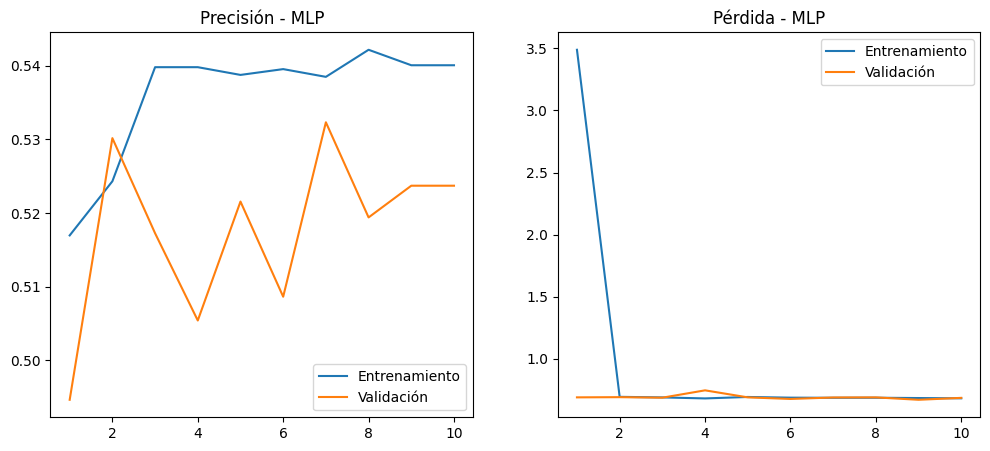

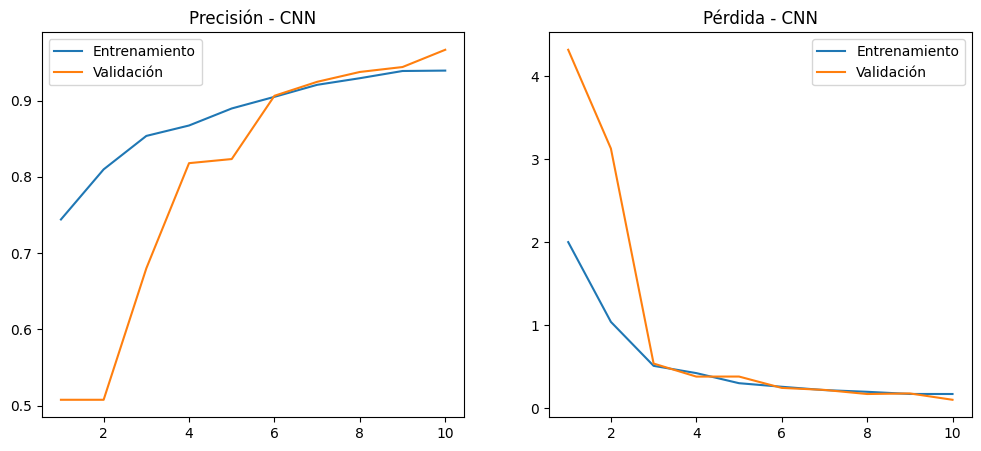

In [21]:
import matplotlib.pyplot as plt

# Función para graficar resultados
def plot_training(history, title):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    # Precisión
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, label='Entrenamiento')
    plt.plot(epochs, val_acc, label='Validación')
    plt.title(f'Precisión - {title}')
    plt.legend()

    # Pérdida
    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, label='Entrenamiento')
    plt.plot(epochs, val_loss, label='Validación')
    plt.title(f'Pérdida - {title}')
    plt.legend()

    plt.show()

# Graficar los resultados de MLP
plot_training(mlp_history, "MLP")

# Graficar los resultados de CNN
plot_training(cnn_history, "CNN")


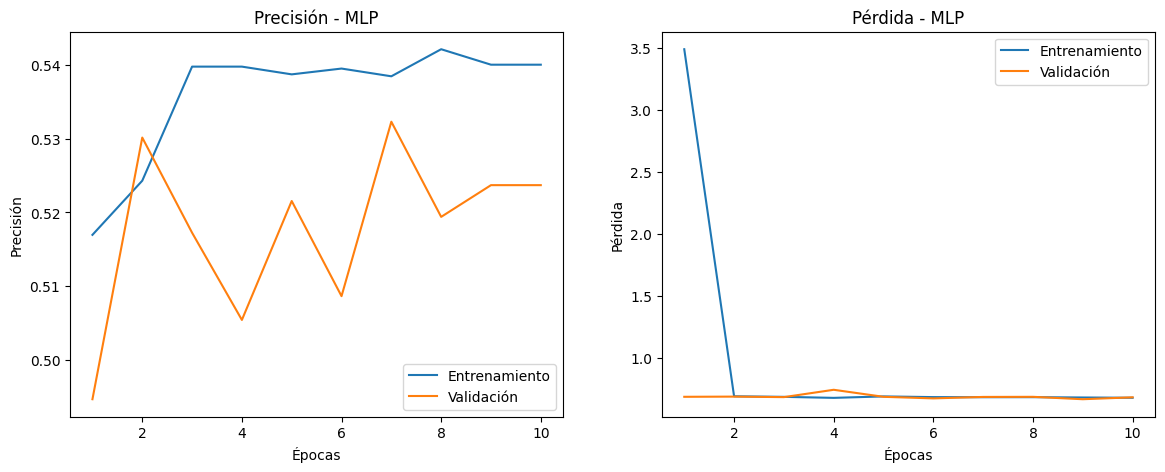

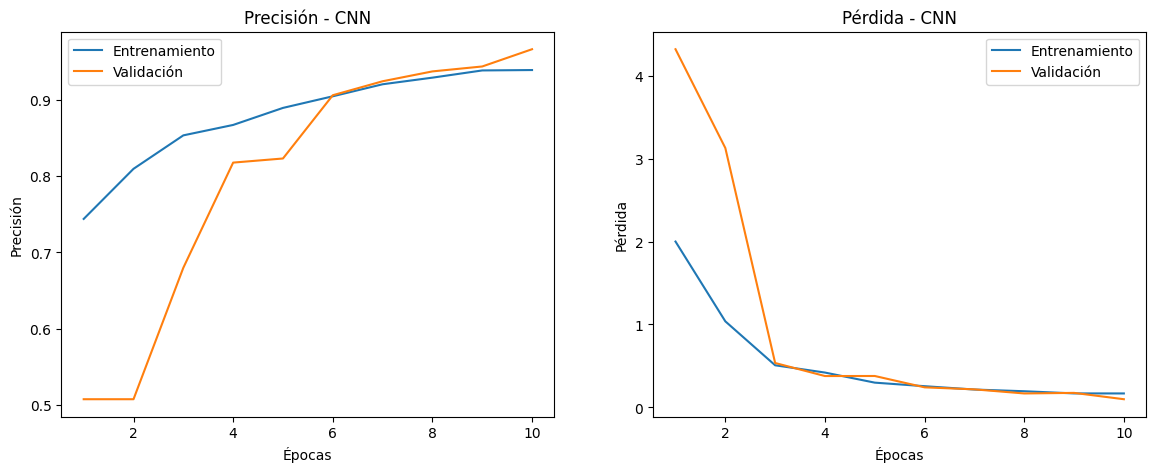

In [22]:
import matplotlib.pyplot as plt

# Función para graficar las curvas de entrenamiento y validación
def plot_training(history, title="Modelo"):
    # Extraer métricas
    acc = history.history['accuracy']          # Precisión en entrenamiento
    val_acc = history.history['val_accuracy']  # Precisión en validación
    loss = history.history['loss']             # Pérdida en entrenamiento
    val_loss = history.history['val_loss']     # Pérdida en validación

    # Generar los rangos de épocas
    epochs = range(1, len(acc) + 1)

    # Graficar precisión
    plt.figure(figsize=(14, 5))

    # Precisión
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, label='Entrenamiento')
    plt.plot(epochs, val_acc, label='Validación')
    plt.title(f'Precisión - {title}')
    plt.xlabel('Épocas')
    plt.ylabel('Precisión')
    plt.legend()

    # Pérdida
    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, label='Entrenamiento')
    plt.plot(epochs, val_loss, label='Validación')
    plt.title(f'Pérdida - {title}')
    plt.xlabel('Épocas')
    plt.ylabel('Pérdida')
    plt.legend()

    plt.show()

# Graficar las curvas del modelo MLP
plot_training(mlp_history, title="MLP")

# Graficar las curvas del modelo CNN
plot_training(cnn_history, title="CNN")


In [23]:
mlp_history = mlp_model.fit(train_dataset, validation_data=val_dataset, epochs=10, verbose=1)
cnn_history = cnn_model.fit(train_dataset, validation_data=val_dataset, epochs=10, verbose=1)


Epoch 1/10
119/119 ━━━━━━━━━━━━━━━━━━━━ 34s 272ms/step - accuracy: 0.5231 - loss: 0.6883 - val_accuracy: 0.5226 - val_loss: 0.6791
Epoch 2/10
119/119 ━━━━━━━━━━━━━━━━━━━━ 35s 285ms/step - accuracy: 0.5167 - loss: 0.6938 - val_accuracy: 0.5237 - val_loss: 0.6944
Epoch 3/10
119/119 ━━━━━━━━━━━━━━━━━━━━ 35s 278ms/step - accuracy: 0.5221 - loss: 0.6747 - val_accuracy: 0.5323 - val_loss: 0.6828
Epoch 4/10
119/119 ━━━━━━━━━━━━━━━━━━━━ 37s 296ms/step - accuracy: 0.5232 - loss: 0.6881 - val_accuracy: 0.5237 - val_loss: 0.6760
Epoch 5/10
119/119 ━━━━━━━━━━━━━━━━━━━━ 36s 290ms/step - accuracy: 0.5331 - loss: 0.6759 - val_accuracy: 0.5334 - val_loss: 0.6772
Epoch 6/10
119/119 ━━━━━━━━━━━━━━━━━━━━ 36s 287ms/step - accuracy: 0.5293 - loss: 0.6790 - val_accuracy: 0.5172 - val_loss: 0.6853
Epoch 7/10
119/119 ━━━━━━━━━━━━━━━━━━━━ 35s 279ms/step - accuracy: 0.5341 - loss: 0.6828 - val_accuracy: 0.5151 - val_loss: 0.6671
Epoch 8/10
119/119 ━━━━━━━━━━━━━━━━━━━━ 36s 288ms/step - accuracy: 0.5282 - loss: 0

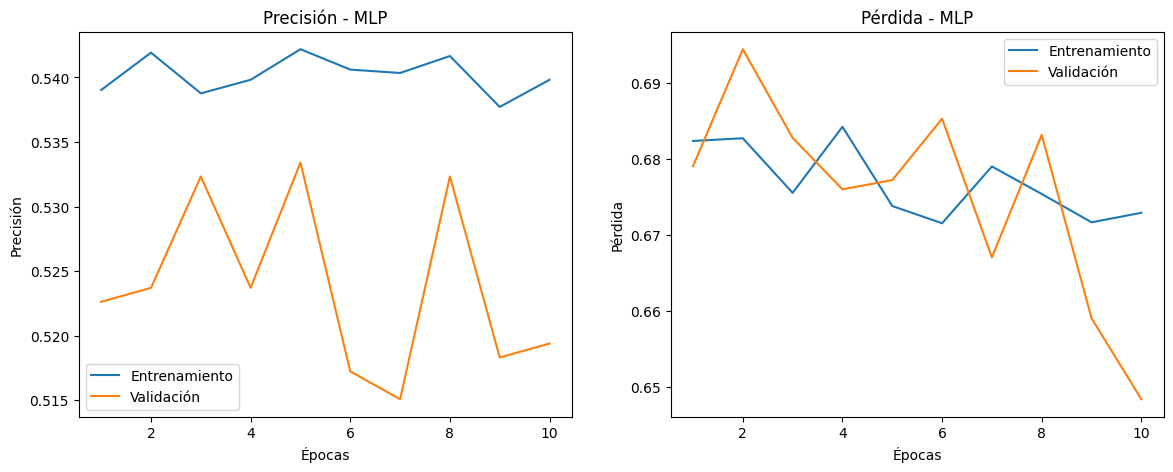

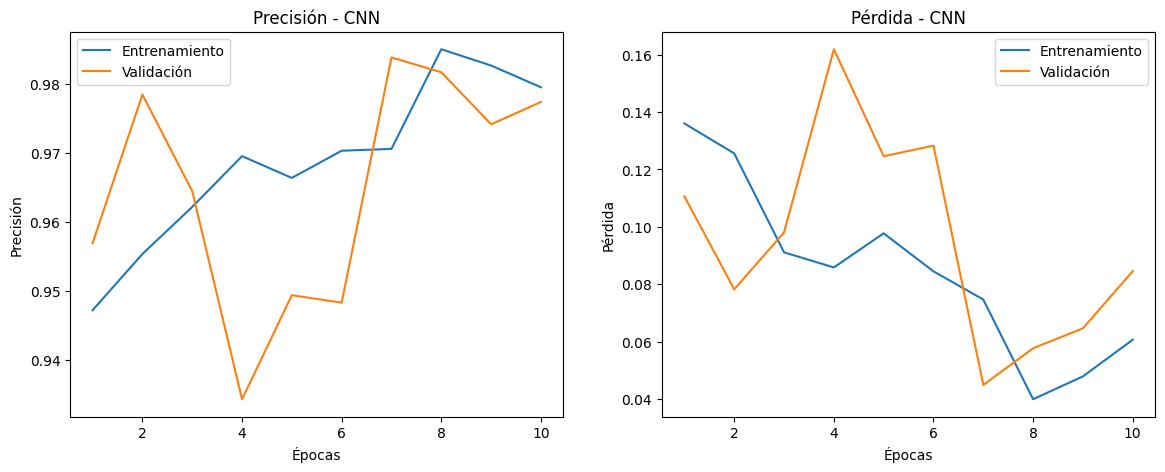

In [24]:
plot_training(mlp_history, title="MLP")
plot_training(cnn_history, title="CNN")